In [1]:
import konlpy.tag 
twitter = konlpy.tag.Twitter()
from tqdm import tqdm
from eunjeon import Mecab

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


# 1. 전처리 수행하기

## 1-1) 형태소 분석(Mecab)

In [2]:
## Mecab이 가장 빠르고 적절한 것으로 판단되어 Mecab으로 진행함

# 사용하고자 하는 품사 선택
FEATURES =['NNG', 'NNP', 'NNB', 'NP', 'VV', 'VA', 'VCP','VCN'] ## 명사, 동사, 형용사
mecab = Mecab()

# ㅋㅋㅋ, ^, . 등 특수 문자 및 무의미한 단어들을 제거하기 위해 명사, 동사, 형용사만 추출

def select_words(text):
    text = text.strip()
    mecab_morphs = mecab.pos(text)
    selected_words=[]
    for word, pos in mecab_morphs:
        if pos in FEATURES:
            selected_words.append(word)
    return ' '.join(selected_words)

In [8]:
with open('2016_movie_reviews.txt', encoding='utf-8') as f:
    docs = [doc.strip().split('\t\t') for doc in f]

In [9]:
with open('2016_filtered_review2.txt', 'w', encoding='utf-8') as f1:
    for doc in tqdm(docs):
        if len(doc)==3:
            review=doc[1]
            doc_review = doc[0]+'\t\t'+select_words(review)+'\t\t'+doc[2]+'\n'
            f1.write(doc_review)

100%|██████████| 788189/788189 [00:47<00:00, 16457.41it/s]


In [5]:
with open('2016_filtered_review2.txt', encoding='utf-8') as f:
    docs = [doc.strip().split('\t\t') for doc in f]
    docs = [(doc[1], int(doc[2])) for doc in docs if len(doc) == 3]
    texts, scores = zip(*docs)
    # 둘을 분리해서 별도의 list 변수로 저장

In [6]:
texts[0:20]

('그렇 치 총 들',
 '진심 쓰레기 영화 만들 줄 알 쫄 틀 웃 거리 없 쓰레기 영화',
 '역대 영화 중 최고 원작 만화 읽 영화 결정 감독 간츠 실사 사람 이 거르 흠잡 데 없 최고 영화 거 싫 하 참 만 히로미 인물 모르',
 '온종일 불편 피범벅 뿐',
 '극치 수 잇 타 잡 때 되',
 '연출 아쉽 마지막 주자 창 대량 학살 신 때문 점수',
 '영화 흔하 우리 모습 주인공 펼치 본격 액션 사격 영화 췌 여고생 존재 의미 모르',
 '캐릭터 역대 급 듯 일본 높이뛰기 비 대박 이 히로미 캐릭터 살리 부분',
 '초반 부 산행 낫 후반 산행 낫 씹 잼',
 '영화 내용 없',
 '태연 태연',
 '새벽 저주 잭 스나이더 레지던트 이블 나 전설 이 월드 워 엠 히어로 영화 종결자 이상 말 필요',
 '무섭 시작 허무 끝 나 영화',
 '여자 친구 비 때 공포 영화 같 장면 인상 이 뒤 갈 내용 산 총 학살 장면 길 정도',
 '일본 영화관 오 관객 대다수 씹 오덕 이 하 애 만들 줄 아 고어 애 다인 일본 영화',
 '원작 만화 보 분 이 영화 보 필요 없',
 '영화 생각 듬',
 '비위 약하 마시 허접 나',
 '영화',
 '보 정도')

## 1-2) 불용어 제거

In [68]:
# 토큰화

token_texts = []
pos_texts = []
for sentence in tqdm(texts):
    token_texts.append(mecab.morphs(sentence))
    pos_texts.append(mecab.pos(sentence))

100%|███████████████████████████████████████████████████████████████████████| 788189/788189 [00:34<00:00, 22995.16it/s]


In [208]:
print(token_texts[0:3])
print()
print(pos_texts[0:3])

[['그렇', '치', '총'], ['진심', '쓰레기', '영화', '만들', '줄', '알', '쫄', '틀', '웃', '거리', '없', '쓰레기', '영화'], ['역대', '영화', '중', '최고', '원작', '만화', '읽', '영화', '결정', '감독', '간츠', '실사', '사람', '거르', '흠잡', '데', '없', '최고', '영화', '거', '싫', '하', '참', '만', '히로미', '인물', '모르']]

[[('그렇', 'VA'), ('치', 'XSN'), ('총', 'MM')], [('진심', 'NNG'), ('쓰레기', 'NNG'), ('영화', 'NNG'), ('만들', 'VV+ETM'), ('줄', 'NNB'), ('알', 'VV+ETM'), ('쫄', 'VV+ETM'), ('틀', 'NNG'), ('웃', 'VV'), ('거리', 'EC'), ('없', 'VA'), ('쓰레기', 'NNG'), ('영화', 'NNG')], [('역대', 'NNG'), ('영화', 'NNG'), ('중', 'NNB'), ('최고', 'NNG'), ('원작', 'NNG'), ('만화', 'NNG'), ('읽', 'VV'), ('영화', 'NNG'), ('결정', 'NNG'), ('감독', 'NNG'), ('간츠', 'NNP'), ('실사', 'NNG'), ('사람', 'NNG'), ('거르', 'VV'), ('흠잡', 'VV'), ('데', 'EC'), ('없', 'VA'), ('최고', 'NNG'), ('영화', 'NNG'), ('거', 'NNB'), ('싫', 'VA'), ('하', 'XSA'), ('참', 'NNG'), ('만', 'JX'), ('히로미', 'NNP'), ('인물', 'NNG'), ('모르', 'NNG')]]


In [209]:
stopwords = ['의','가','이','은','들','는','잘','걍','과','도', '를','으로','자','에','와','한','하다','을','에서','해서']
tt = token_texts.copy()

for i in tt[0:3]:
    print(i)

['그렇', '치', '총']
['진심', '쓰레기', '영화', '만들', '줄', '알', '쫄', '틀', '웃', '거리', '없', '쓰레기', '영화']
['역대', '영화', '중', '최고', '원작', '만화', '읽', '영화', '결정', '감독', '간츠', '실사', '사람', '거르', '흠잡', '데', '없', '최고', '영화', '거', '싫', '하', '참', '만', '히로미', '인물', '모르']


In [71]:
remove_stopwords = []

for word_list in tqdm(tt):
    x = []
    for word in word_list:
        if word not in stopwords:
            x.append(word) 
    remove_stopwords.append(x)         

100%|██████████████████████████████████████████████████████████████████████| 788189/788189 [00:04<00:00, 171054.77it/s]


In [210]:
for i in remove_stopwords[0:3]:
    print(i)

['그렇', '치', '총']
['진심', '쓰레기', '영화', '만들', '줄', '알', '쫄', '틀', '웃', '거리', '없', '쓰레기', '영화']
['역대', '영화', '중', '최고', '원작', '만화', '읽', '영화', '결정', '감독', '간츠', '실사', '사람', '거르', '흠잡', '데', '없', '최고', '영화', '거', '싫', '하', '참', '만', '히로미', '인물', '모르']


In [73]:
detokenized = []
for i in remove_stopwords:
    t = ' '.join(i)
    detokenized.append(t)

In [74]:
texts = tuple(detokenized)
texts[0:5]

('그렇 치 총',
 '진심 쓰레기 영화 만들 줄 알 쫄 틀 웃 거리 없 쓰레기 영화',
 '역대 영화 중 최고 원작 만화 읽 영화 결정 감독 간츠 실사 사람 거르 흠잡 데 없 최고 영화 거 싫 하 참 만 히로미 인물 모르',
 '온종일 불편 피범벅 뿐',
 '극치 수 잇 타 잡 때 되')

# 2. 평점 정보를 사용해서 긍정(1) 또는 부정(0)의 값을 갖는 새로운 종속 변수 생성

In [75]:
filtered_texts = []
filtered_labels = []

for text, score in zip(texts, scores):
    if 4 < score < 8:
        continue
        
    # 평점 기준으로 문서에 label을 부여
    # 1 ~ 4 -> 부정, 0
    # 8 ~ 10 -> 긍정, 1
    filtered_texts.append(text)
    filtered_labels.append(1 if score >= 8 else 0)

In [76]:
len(filtered_texts)

672606

In [223]:
filtered_texts[0:5]

['진심 쓰레기 영화 만들 줄 알 쫄 틀 웃 거리 없 쓰레기 영화',
 '역대 영화 중 최고 원작 만화 읽 영화 결정 감독 간츠 실사 사람 거르 흠잡 데 없 최고 영화 거 싫 하 참 만 히로미 인물 모르',
 '극치 수 잇 타 잡 때 되',
 '캐릭터 역대 급 듯 일본 높이뛰기 비 대박 히로미 캐릭터 살리 부분',
 '영화 내용 없']

In [224]:
len(filtered_labels)

672606

In [225]:
filtered_labels[0:5]

[0, 1, 0, 1, 0]

### 2-1) 최종 데이터 셋

In [405]:
with open('2016_filtered_review_final.txt', 'w', encoding='utf-8') as f2:
    for final_doc in tqdm(docs):
            final_review=final_doc[0]
            if final_doc[1]>=8 or final_doc[1]<=4:
                final_doc_review = final_doc[0]+'\t\t'+str(final_doc[1])+'\n'
                f2.write(final_doc_review)

100%|██████████████████████████████████████████████████████████████████████| 788189/788189 [00:01<00:00, 743427.75it/s]


# 3. 학습 데이터셋과 평가 데이터셋 구분

In [178]:
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_labels, test_labels = train_test_split(filtered_texts, filtered_labels, test_size=0.1, random_state=0)

In [228]:
train_texts[0:5]

['천만 이해 되 영화',
 '재밌 감동 시간 러닝 타임',
 '보 꿀 잼 이당 노 잼 명작 짱 작',
 '나라 감사 호국 영웅 잠드',
 '배우 이름값 하 남 재밌']

In [180]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression ## 로지스틱 회귀모형 사용

# 4. CounterVectorizer

In [240]:
tf_vectorizer = CountVectorizer(min_df=1000, ngram_range=(1,1)) 
tf_train_features = tf_vectorizer.fit_transform(train_texts) 
tf_test_features = tf_vectorizer.transform(test_texts)

In [241]:
vocablist = [word for word, _ in sorted(tf_vectorizer.vocabulary_.items(), key=lambda x:x[1])]

In [242]:
vocablist[:20]

['가능',
 '가볍',
 '가슴',
 '가족',
 '가지',
 '감독',
 '감동',
 '감명깊',
 '감사',
 '감상',
 '감성',
 '감정',
 '감탄',
 '강동원',
 '강추',
 '개그',
 '개꿀',
 '개봉',
 '개연',
 '개인']

### 4-1) Grid Search + Cross validation

In [243]:
from sklearn.model_selection import GridSearchCV
lg = LogisticRegression(solver = 'saga')
param_grid = { 'penalty': ['l1', 'l2'], 'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10] }

In [244]:
# 그리드 서치 진행
grid_search = GridSearchCV(estimator = lg, param_grid = param_grid, cv=5, n_jobs = -1)        

In [245]:
grid_search.fit(tf_train_features, train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
                         'penalty': ['l1', 'l2']})

In [246]:
grid_search.best_params_

{'C': 0.5, 'penalty': 'l1'}

In [247]:
lr1_tf = LogisticRegression(C=0.5, penalty='l1', solver='saga') # Ridge regression
# C = Inverse of regularization strength, 즉 C 값이 작을수록 penalty를 많이 줌
# penalty를 많이 준다는 뜻은 L1 같은 경우는 feature의 수를 그만큼 많이 줄인다는 뜻이고
# L2인 경우는 weight 값을 더 0에 가깝게 한다는 의미
lr1_tf.fit(tf_train_features, train_labels) # 학습
pred_labels = lr1_tf.predict(tf_test_features)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [415]:
from sklearn.metrics import accuracy_score
print('Misclassified samples: {} out of {}'.format((pred_labels != test_labels).sum(),len(test_labels)))
print('Accuracy: %.3f' % accuracy_score(test_labels, pred_labels))

Misclassified samples: 7440 out of 67261
Accuracy: 0.889


### 4-2) Confusion Matrix + ROC & AUC

In [249]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, pred_labels)

# Accuracy = 전체 예측한 것 중 올바른 예측을 얼마나 했는지
# Sensitivity(recall) = True positive rate로 실제 Positive를 얼마나 잘 예측했는지
# Precision = 정밀도로 긍정으로 예측한 것 중 실제로 맞춘 비율
# F1 Score = 불균형 분류문제에서 평가 척도로 주로 사용


array([[ 2531,  6549],
       [  891, 57290]], dtype=int64)

In [250]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.74      0.28      0.40      9080
           1       0.90      0.98      0.94     58181

    accuracy                           0.89     67261
   macro avg       0.82      0.63      0.67     67261
weighted avg       0.88      0.89      0.87     67261



In [253]:
labels_prob = lr1_tf.predict_proba(tf_test_features)

In [254]:
pred_labels

array([1, 1, 1, ..., 1, 1, 1])

In [255]:
labels_prob

array([[0.03113812, 0.96886188],
       [0.12181195, 0.87818805],
       [0.28293576, 0.71706424],
       ...,
       [0.00806752, 0.99193248],
       [0.0476703 , 0.9523297 ],
       [0.02301983, 0.97698017]])

In [256]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(test_labels, labels_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_labels))]
p_fpr, p_tpr, _ = roc_curve(test_labels, random_probs, pos_label=1)

In [257]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(test_labels, labels_prob[:,1])

print(auc_score1)

# AUC가 높을수록 최적의 분류 모델을 나타냄

0.836159041921962


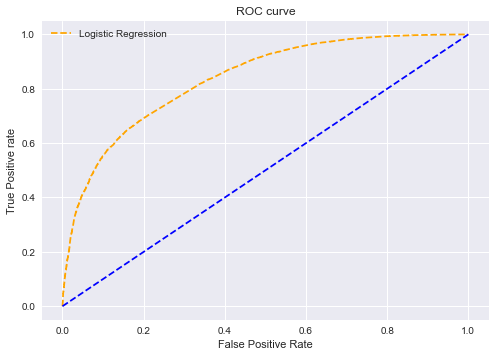

In [258]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

### 4-3) 상위 긍정 단어 50개 + 상위 부정 단어 50개 출력

In [286]:
# Get coefficients of the model 
coefficients = lr1_tf.coef_.tolist()

sorted_coefficients = sorted(enumerate(coefficients[0]), key=lambda x:x[1], reverse=True)
# 학습에 사용된 각 단어마다의 coefficient (즉 weight) 값이 존재
# coefficient값이 큰 순으로 정렬 'reverse=True'

print(sorted_coefficients[:5])
# 상위 긍정 단어 50개 출력
for word, coef in sorted_coefficients[:50]:
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))
print()
# 상위 부정 단어 50개 출력
for word, coef in reversed(sorted_coefficients[-50:]):
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))

[(14, 2.4407024630568785), (225, 2.3695202196004685), (299, 2.2070977755850545), (325, 2.143483042153371), (2, 2.10721869335413)]
강추 (2.441)
여운 (2.370)
재미있 (2.207)
즐겁 (2.143)
가슴 (2.107)
만족 (2.080)
감사 (2.063)
개꿀 (2.060)
완벽 (2.028)
재밌 (1.912)
대박 (1.901)
최고 (1.898)
수작 (1.853)
심장 (1.851)
행복 (1.798)
멋지 (1.716)
감탄 (1.587)
유쾌 (1.527)
만점 (1.515)
긴장 (1.493)
가볍 (1.491)
윤동주 (1.473)
힐링 (1.440)
감명깊 (1.428)
멋있 (1.415)
마음 (1.390)
걱정 (1.332)
전문가 (1.321)
괜찮 (1.268)
상상력 (1.223)
나름 (1.215)
슬프 (1.210)
팀버튼 (1.201)
귀엽 (1.190)
사랑 (1.177)
인상 (1.171)
통쾌 (1.169)
매력 (1.167)
눈빛 (1.156)
여름 (1.128)
박수 (1.128)
즐기 (1.121)
넘치 (1.116)
아이 (1.100)
송강호 (1.095)
소름 (1.094)
신나 (1.061)
나쁘 (1.052)
평론가 (1.015)
슬픔 (1.011)

최악 (-4.141)
쓰레기 (-2.604)
재미없 (-2.367)
왜곡 (-2.270)
억지 (-2.161)
짜증 (-2.010)
아깝 (-1.827)
개연 (-1.734)
수준 (-1.638)
실망 (-1.588)
유치 (-1.538)
시나리오 (-1.512)
댓글 (-1.433)
이것 (-1.370)
평점 (-1.167)
정우성 (-1.145)
예고편 (-1.096)
신파 (-1.078)
설정 (-1.051)
이거 (-0.914)
감독 (-0.898)
별점 (-0.892)
정신 (-0.847)
진심 (-0.845)
허무 (-0.821)
불편 (-

### 4-4 optional) 불균형 클래스 문제 해소

In [373]:
vocablist3 = [word for word, _ in sorted(tf_vectorizer.vocabulary_.items(), key=lambda x:x[1])]

In [322]:
# '0'값과 '1'값의 개수를 맞춰줌 (0의 개수 81312 -> 524033)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
tf_train_features_over, train_labels_over = smote.fit_sample(tf_train_features, train_labels)

In [335]:
print(train_labels.count(0))
print(train_labels.count(1), '\n')
print(train_labels_over.count(0))
print(train_labels_over.count(1))

81312
524033 

524033
524033


In [340]:
# 그리드 서치 진행
grid_search3 = GridSearchCV(estimator = lg, param_grid = param_grid, cv=5, n_jobs = -1) 

In [341]:
grid_search3.fit(tf_train_features_over, train_labels_over)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
                         'penalty': ['l1', 'l2']})

In [342]:
grid_search3.best_params_

{'C': 0.05, 'penalty': 'l1'}

In [343]:
lr3_tf = LogisticRegression(C=0.05, penalty='l1', solver='saga')
lr3_tf.fit(tf_train_features_over, train_labels_over) # 학습
pred_labels3 = lr3_tf.predict(tf_test_features)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [345]:
from sklearn.metrics import accuracy_score
print('Misclassified samples: {} out of {}'.format((pred_labels3 != test_labels).sum(),len(test_labels)))
print('Accuracy: %.3f' % accuracy_score(test_labels, pred_labels3))

Misclassified samples: 19594 out of 67261
Accuracy: 0.709


In [346]:
confusion_matrix(test_labels, pred_labels3)

array([[ 6792,  2288],
       [17306, 40875]], dtype=int64)

In [347]:
print(classification_report(test_labels, pred_labels3))

              precision    recall  f1-score   support

           0       0.28      0.75      0.41      9080
           1       0.95      0.70      0.81     58181

    accuracy                           0.71     67261
   macro avg       0.61      0.73      0.61     67261
weighted avg       0.86      0.71      0.75     67261



In [348]:
labels_prob3 = lr3_tf.predict_proba(tf_test_features)

In [349]:
# roc curve for models
fpr3, tpr3, thresh3 = roc_curve(test_labels, labels_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_labels))]
p_fpr3, p_tpr3, _ = roc_curve(test_labels, random_probs, pos_label=1)

In [350]:
# auc scores
auc_score3 = roc_auc_score(test_labels, labels_prob3[:,1])

print(auc_score3)

0.8066177736619742


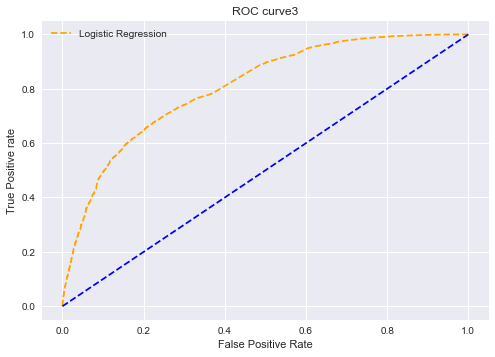

In [351]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr3, p_tpr3, linestyle='--', color='blue')
# title
plt.title('ROC curve3')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC3',dpi=300)
plt.show()

In [374]:
# Get coefficients of the model 
coefficients3 = lr3_tf.coef_.tolist()

sorted_coefficients3 = sorted(enumerate(coefficients3[0]), key=lambda x:x[1], reverse=True)
# 학습에 사용된 각 단어마다의 coefficient (즉 weight) 값이 존재
# coefficient값이 큰 순으로 정렬 'reverse=True'

print(sorted_coefficients3[:5])
# 상위 긍정 단어 50개 출력
for word, coef in sorted_coefficients3[:50]:
    print('{0:} ({1:.3f})'.format(vocablist3[word], coef))
print()
# 상위 부정 단어 50개 출력
for word, coef in reversed(sorted_coefficients3[-50:]):
    print('{0:} ({1:.3f})'.format(vocablist3[word], coef))

[(225, 3.80261060150289), (325, 3.5202438958278406), (14, 3.4338777976159722), (16, 3.3275518374643087), (104, 3.254546199858446)]
여운 (3.803)
즐겁 (3.520)
강추 (3.434)
개꿀 (3.328)
만족 (3.255)
가슴 (3.239)
심장 (3.119)
완벽 (3.118)
멋지 (3.021)
행복 (2.932)
감사 (2.848)
감명깊 (2.790)
재미있 (2.742)
유쾌 (2.722)
긴장 (2.715)
대박 (2.684)
힐링 (2.670)
가볍 (2.642)
감탄 (2.634)
수작 (2.575)
만점 (2.542)
최고 (2.503)
윤동주 (2.487)
멋있 (2.371)
여름 (2.356)
상상력 (2.355)
통쾌 (2.307)
신나 (2.294)
귀엽 (2.246)
마음 (2.229)
재밌 (2.191)
슬프 (2.185)
눈빛 (2.175)
즐기 (2.166)
인상 (2.114)
나름 (2.080)
매력 (2.063)
괜찮 (2.027)
볼거리 (2.015)
팀버튼 (2.004)
넘치 (1.983)
스파이더맨 (1.978)
순수 (1.977)
슬픔 (1.953)
송강호 (1.948)
걱정 (1.905)
나쁘 (1.904)
오락 (1.901)
가족 (1.890)
소름 (1.883)

최악 (-4.157)
억지 (-2.457)
왜곡 (-2.448)
쓰레기 (-2.433)
재미없 (-2.249)
개연 (-1.664)
짜증 (-1.653)
아깝 (-1.571)
수준 (-1.487)
실망 (-1.425)
평점 (-1.210)
정우성 (-1.166)
댓글 (-1.150)
시나리오 (-1.124)
유치 (-1.003)
이것 (-0.910)
감독 (-0.880)
예고편 (-0.779)
이거 (-0.755)
내용 (-0.754)
스토리 (-0.737)
신파 (-0.701)
설정 (-0.658)
진심 (-0.527)
드라마 (-0.504)


# 5. TF-IDF Vectorizer

In [194]:
tfidf_vectorizer = TfidfVectorizer(min_df=1000, ngram_range=(1,1)) 
tfidf_train_features = tfidf_vectorizer.fit_transform(train_texts) 
tfidf_test_features = tfidf_vectorizer.transform(test_texts)

In [195]:
vocablist2 = [word for word, _ in sorted(tfidf_vectorizer.vocabulary_.items(), key=lambda x:x[1])]

In [230]:
vocablist2[:20]

['가능',
 '가볍',
 '가슴',
 '가족',
 '가지',
 '감독',
 '감동',
 '감명깊',
 '감사',
 '감상',
 '감성',
 '감정',
 '감탄',
 '강동원',
 '강추',
 '개그',
 '개꿀',
 '개봉',
 '개연',
 '개인']

### 5-1) Grid Search + Cross validation

In [197]:
grid_search2 = GridSearchCV(estimator = lg, param_grid = param_grid, cv=5, n_jobs = -1)    

In [198]:
grid_search2.fit(tfidf_train_features, train_labels)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
                         'penalty': ['l1', 'l2']})

In [199]:
grid_search2.best_params_

{'C': 2, 'penalty': 'l1'}

In [200]:
lr2_tfidf = LogisticRegression(C=2, penalty='l1', solver='saga') # Lasso regression
lr2_tfidf.fit(tfidf_train_features, train_labels) # 학습
pred_labels2 = lr2_tfidf.predict(tfidf_test_features)

In [201]:
print('Misclassified samples: {} out of {}'.format((pred_labels2 != test_labels).sum(),len(test_labels)))
print('Accuracy: %.3f' % accuracy_score(test_labels, pred_labels2))

Misclassified samples: 7526 out of 67261
Accuracy: 0.888


### 5-2) Confusion Matrix + ROC & AUC

In [261]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, pred_labels2)

array([[ 2533,  6547],
       [  979, 57202]], dtype=int64)

In [262]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_labels2))

              precision    recall  f1-score   support

           0       0.72      0.28      0.40      9080
           1       0.90      0.98      0.94     58181

    accuracy                           0.89     67261
   macro avg       0.81      0.63      0.67     67261
weighted avg       0.87      0.89      0.87     67261



In [263]:
labels_prob2 = lr2_tfidf.predict_proba(tfidf_test_features)

In [264]:
pred_labels2

array([1, 1, 1, ..., 1, 1, 1])

In [265]:
labels_prob2

array([[0.04135037, 0.95864963],
       [0.10362   , 0.89638   ],
       [0.38827551, 0.61172449],
       ...,
       [0.00325917, 0.99674083],
       [0.04852774, 0.95147226],
       [0.00565376, 0.99434624]])

In [267]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(test_labels, labels_prob2[:,1], pos_label=1)

# roc curve for tpr2 = fpr2
random_probs = [0 for i in range(len(test_labels))]
p_fpr2, p_tpr2, _ = roc_curve(test_labels, random_probs, pos_label=1)

In [268]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score2 = roc_auc_score(test_labels, labels_prob2[:,1])

print(auc_score2)

0.838323731039252


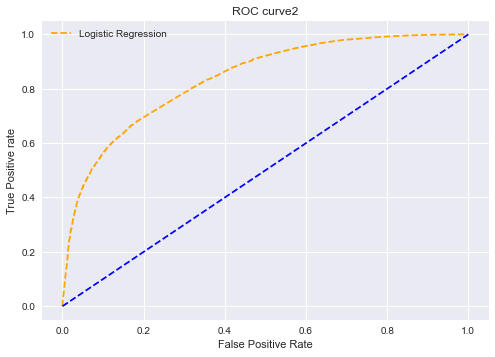

In [269]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue')
# title
plt.title('ROC curve2')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC2',dpi=300)
plt.show()

### 5-3) 상위 긍정 단어 50개 + 상위 부정 단어 50개 출력

In [285]:
# Get coefficients of the model 
coefficients2 = lr2_tfidf.coef_.tolist()

sorted_coefficients2 = sorted(enumerate(coefficients2[0]), key=lambda x:x[1], reverse=True)
# 학습에 사용된 각 단어마다의 coefficient (즉 weight) 값이 존재
# coefficient값이 큰 순으로 정렬 'reverse=True'

print(sorted_coefficients2[:5])
# print top 50 positive words
for word, coef in sorted_coefficients2[:50]:
    print('{0:} ({1:.3f})'.format(vocablist2[word], coef))

print()
# print top 50 negative words
for word, coef in reversed(sorted_coefficients2[-50:]):
    print('{0:} ({1:.3f})'.format(vocablist2[word], coef))

[(325, 4.506141111564894), (225, 4.358086058753175), (14, 4.181580464056029), (300, 4.174656841891096), (299, 4.0996618587328175)]
즐겁 (4.506)
여운 (4.358)
강추 (4.182)
재밌 (4.175)
재미있 (4.100)
최고 (3.894)
가슴 (3.873)
만족 (3.723)
완벽 (3.704)
감사 (3.653)
개꿀 (3.504)
멋지 (3.436)
심장 (3.374)
수작 (3.274)
대박 (3.274)
행복 (3.203)
감탄 (3.177)
윤동주 (3.084)
감명깊 (2.996)
힐링 (2.748)
유쾌 (2.686)
마음 (2.525)
긴장 (2.522)
멋있 (2.460)
사랑 (2.417)
만점 (2.357)
눈빛 (2.346)
가볍 (2.338)
통쾌 (2.319)
괜찮 (2.262)
신나 (2.222)
매력 (2.220)
상상력 (2.216)
나름 (2.189)
넘치 (2.066)
슬픔 (2.049)
걱정 (2.049)
슬프 (2.043)
감동 (1.996)
귀엽 (1.972)
인상 (1.958)
아이 (1.905)
송강호 (1.868)
즐기 (1.846)
눈물 (1.829)
가족 (1.806)
여름 (1.800)
팀버튼 (1.719)
소름 (1.704)
모습 (1.683)

최악 (-7.896)
쓰레기 (-4.622)
억지 (-4.068)
왜곡 (-4.009)
재미없 (-3.896)
개연 (-3.545)
짜증 (-3.347)
수준 (-3.144)
아깝 (-2.854)
댓글 (-2.692)
시나리오 (-2.634)
실망 (-2.455)
평점 (-2.382)
유치 (-2.269)
신파 (-2.184)
이것 (-2.173)
정우성 (-2.122)
설정 (-1.993)
감독 (-1.927)
예고편 (-1.846)
관객 (-1.630)
내용 (-1.568)
별점 (-1.544)
이거 (-1.492)
출연 (-1.490)
정신 (-1

### 5-4 optional) 불균형 클래스 문제 해소

In [375]:
vocablist4 = [word for word, _ in sorted(tf_vectorizer.vocabulary_.items(), key=lambda x:x[1])]

In [359]:
# '0'값과 '1'값의 개수를 맞춰줌 (0의 개수 81312 -> 524033)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
tfidf_train_features_over, train_labels_over2 = smote.fit_sample(tfidf_train_features, train_labels)

In [360]:
print(train_labels.count(0))
print(train_labels.count(1), '\n')
print(train_labels_over2.count(0))
print(train_labels_over2.count(1))

81312
524033 

524033
524033


In [361]:
# 그리드 서치 진행
grid_search4 = GridSearchCV(estimator = lg, param_grid = param_grid, cv=5, n_jobs = -1) 

In [362]:
grid_search4.fit(tfidf_train_features_over, train_labels_over2)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
                         'penalty': ['l1', 'l2']})

In [363]:
grid_search4.best_params_

{'C': 0.05, 'penalty': 'l1'}

In [364]:
lr4_tfidf = LogisticRegression(C=0.05, penalty='l1', solver='saga')
lr4_tfidf.fit(tfidf_train_features_over, train_labels_over2) # 학습
pred_labels4 = lr4_tfidf.predict(tfidf_test_features)

In [365]:
print('Misclassified samples: {} out of {}'.format((pred_labels4 != test_labels).sum(),len(test_labels)))
print('Accuracy: %.3f' % accuracy_score(test_labels, pred_labels4))

Misclassified samples: 19948 out of 67261
Accuracy: 0.703


In [366]:
confusion_matrix(test_labels, pred_labels4)

array([[ 7312,  1768],
       [18180, 40001]], dtype=int64)

In [367]:
print(classification_report(test_labels, pred_labels4))

              precision    recall  f1-score   support

           0       0.29      0.81      0.42      9080
           1       0.96      0.69      0.80     58181

    accuracy                           0.70     67261
   macro avg       0.62      0.75      0.61     67261
weighted avg       0.87      0.70      0.75     67261



In [368]:
labels_prob4 = lr4_tfidf.predict_proba(tfidf_test_features)

In [369]:
# roc curve for models
fpr4, tpr4, thresh4 = roc_curve(test_labels, labels_prob4[:,1], pos_label=1)

# roc curve for tpr4 = fpr4
random_probs = [0 for i in range(len(test_labels))]
p_fpr4, p_tpr4, _ = roc_curve(test_labels, random_probs, pos_label=1)

In [371]:
# auc scores
auc_score4 = roc_auc_score(test_labels, labels_prob4[:,1])

print(auc_score4)

0.8351036928128057


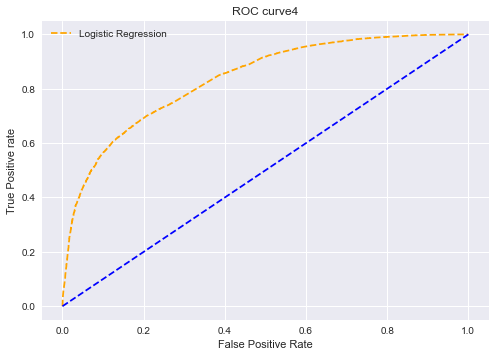

In [372]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr4, p_tpr4, linestyle='--', color='blue')
# title
plt.title('ROC curve4')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC4',dpi=300)
plt.show()

In [376]:
# Get coefficients of the model 
coefficients4 = lr4_tfidf.coef_.tolist()

sorted_coefficients4 = sorted(enumerate(coefficients4[0]), key=lambda x:x[1], reverse=True)
# 학습에 사용된 각 단어마다의 coefficient (즉 weight) 값이 존재
# coefficient값이 큰 순으로 정렬 'reverse=True'

print(sorted_coefficients4[:5])
# print top 50 positive words
for word, coef in sorted_coefficients4[:50]:
    print('{0:} ({1:.3f})'.format(vocablist4[word], coef))

print()
# print top 50 negative words
for word, coef in reversed(sorted_coefficients4[-50:]):
    print('{0:} ({1:.3f})'.format(vocablist4[word], coef))

[(225, 4.702737683038632), (325, 4.345145982514701), (2, 4.27582498035145), (299, 4.224546536490869), (14, 4.11614439057654)]
여운 (4.703)
즐겁 (4.345)
가슴 (4.276)
재미있 (4.225)
강추 (4.116)
최고 (4.112)
재밌 (4.107)
만족 (3.917)
감사 (3.768)
완벽 (3.756)
멋지 (3.710)
대박 (3.458)
심장 (3.388)
행복 (3.294)
개꿀 (3.234)
윤동주 (3.158)
감탄 (3.041)
통쾌 (2.980)
마음 (2.905)
감명깊 (2.889)
멋있 (2.882)
수작 (2.766)
긴장 (2.758)
힐링 (2.735)
사랑 (2.729)
매력 (2.640)
유쾌 (2.615)
넘치 (2.609)
괜찮 (2.575)
나름 (2.538)
상상력 (2.527)
감동 (2.526)
가볍 (2.482)
신나 (2.427)
슬프 (2.363)
아이 (2.340)
귀엽 (2.309)
눈빛 (2.295)
가족 (2.292)
만점 (2.271)
슬픔 (2.268)
눈물 (2.105)
인상 (2.056)
송강호 (2.007)
모습 (1.968)
인생 (1.962)
소름 (1.948)
즐기 (1.923)
캡틴 (1.903)
국민 (1.887)

최악 (-8.044)
쓰레기 (-4.508)
억지 (-4.076)
왜곡 (-3.812)
재미없 (-3.761)
개연 (-3.380)
짜증 (-3.053)
수준 (-3.010)
아깝 (-2.612)
댓글 (-2.361)
실망 (-2.337)
시나리오 (-2.295)
평점 (-2.282)
정우성 (-2.036)
이것 (-1.824)
유치 (-1.806)
신파 (-1.770)
설정 (-1.724)
감독 (-1.705)
예고편 (-1.611)
내용 (-1.316)
관객 (-1.287)
이거 (-1.277)
별점 (-1.256)
떨어지 (-1.223)
드라마 (-1.198